# Curso de SQL Avanzado

<img src="https://amei.mx/wp-content/uploads/2016/08/Scotiabank-logo.jpg" alt="Scotiabank Logo" height="60">
<img src="https://www.belatrix.com/wp-content/uploads/2023/08/belatrix-logosweb-1.png" alt="Belatrix Logo" height="60">


**[Scotiabank](https://www.scotiabank.com.mx)** | **[Belatrix](https://www.belatrix.com)**

Instructor: [Alan Badillo Salas](alan@nomadacode.com)

## Sesión 05

In [2]:
!pip install pymssql

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.6/4.6 MB 30.0 MB/s eta 0:00:00


In [22]:
import pymssql

conn = pymssql.connect("3.93.192.216", "test_curso", "TestCurso$123", "test_curso")

cursor = conn.cursor()

print("Cursor creado")

Cursor creado


In [23]:
cursor.execute("""
select @@version
""")

column1, = cursor.fetchone()

print(column1)

Microsoft SQL Server 2019 (RTM-CU25) (KB5033688) - 15.0.4355.3 (X64) 
	Jan 30 2024 17:02:22 
	Copyright (C) 2019 Microsoft Corporation
	Express Edition (64-bit) on Windows Server 2019 Datacenter 10.0 <X64> (Build 17763: ) (Hypervisor)



ID: 1 | TODOS COUNT: 46
ID: 2 | TODOS COUNT: 39
ID: 3 | TODOS COUNT: 40
[1, 2, 3]
[46, 39, 40]


<Axes: >

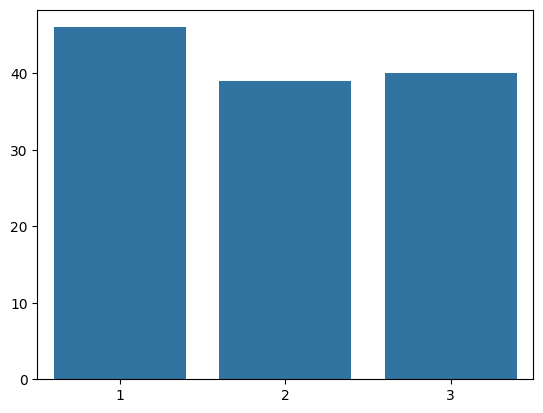

In [10]:
cursor.execute("""
select id, dbo.countTodosByUserId(id) from users;
""")

user_ids = []
todos_counts = []

for id, todosCount in cursor.fetchall():
  print(f"ID: {id} | TODOS COUNT: {todosCount}")
  user_ids.append(id)
  todos_counts.append(todosCount)

print(user_ids)
print(todos_counts)

import seaborn as sns

sns.barplot(x=user_ids, y=todos_counts)

In [11]:
cursor.execute("""
create function dbo.hello()
returns varchar(255)
as
begin
  -- TODO: Más lógica

  return 'Hello SQL Server from Function 👋'
end
""")
conn.commit()

In [12]:
cursor.execute("select dbo.hello()")

for saludo, in cursor.fetchall():
  print(saludo)

Hello SQL Server from Function ??


## Llamar a un procedimiento almacenado desde pymssql

In [21]:
username = input("Nombre de usuario: ")
password = input("Contraseña: ")
firstname = input("Nombre de la persona: ")
lastnname = input("Apellidos de la persona: ")

cursor.execute(
    """
      declare @lastId int;

      execute dbo.createUser
        @username = %s,
        @password = %s,
        @firstname = %s,
        @lastname = %s,
        @insertedId = @lastId output
      ;

      select isnull(@lastId, -1);
    """,
    (username, password, firstname, lastnname)
)

id, = cursor.fetchone()

print(f"ID: {id}")

conn.commit()

Nombre de usuario: zz
Contraseña: zz123
Nombre de la persona: ZZ
Apellidos de la persona: TT
ID: 14
